# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [3]:
#Creating URL with API key
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key
city_url = url + "&q=rikitea"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -134.97, 'lat': -23.12},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'model',
 'main': {'temp': 76.28,
  'pressure': 1017,
  'humidity': 79,
  'temp_min': 76.28,
  'temp_max': 76.28,
  'sea_level': 1017,
  'grnd_level': 1017},
 'wind': {'speed': 3.11, 'deg': 141},
 'clouds': {'all': 23},
 'dt': 1573073905,
 'sys': {'country': 'PF', 'sunrise': 1573049495, 'sunset': 1573096526},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key

#Store retrieved data

city_data = []
print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + city
    record_count += 1
    print("Processing Record %s of Set %s | %s" %(record_count, set_count, city))
    try:
        city_weather = requests.get(city_url).json()
        city_max_temp = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_humidity = city_weather["main"]["humidity"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_wind_speed = city_weather["wind"]["speed"]
        
        city_data.append({"City" : city, 
                         "Cloudiness" : city_clouds,
                         "Country" : city_country,
                         "Date" : city_date,
                         "Humidity" : city_humidity,
                         "Lat" : city_lat,
                         "Lng" : city_lng,
                         "Max Temp" : city_max_temp,
                         "Wind Speed" : city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | borgarnes
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | toliary
City not found. Skipping...
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | jinchang
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | malanje
Processing Record 19 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | ritchie
Processing Record 23 of Set 1 | ushuaia

Processing Record 31 of Set 4 | bilma
Processing Record 32 of Set 4 | padang
Processing Record 33 of Set 4 | emerald
Processing Record 34 of Set 4 | mahebourg
Processing Record 35 of Set 4 | medowie
Processing Record 36 of Set 4 | lasa
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | namibe
Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | karpogory
Processing Record 42 of Set 4 | mecca
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | aflu
City not found. Skipping...
Processing Record 45 of Set 4 | atambua
Processing Record 46 of Set 4 | kichera
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | punta alta
Processing Record 49 of Set 4 | coihaique
Processing Record 50 of Set 4 | westport
Processing Record 1 of Set 5 | skagen
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | aykhal
Processing Record 4 of Set 5 | yangambi
Processin

Processing Record 25 of Set 8 | bargal
City not found. Skipping...
Processing Record 26 of Set 8 | devonport
Processing Record 27 of Set 8 | pontianak
Processing Record 28 of Set 8 | tommot
Processing Record 29 of Set 8 | visby
Processing Record 30 of Set 8 | yeppoon
Processing Record 31 of Set 8 | chokurdakh
Processing Record 32 of Set 8 | the valley
Processing Record 33 of Set 8 | songkhla
Processing Record 34 of Set 8 | beya
Processing Record 35 of Set 8 | caxito
Processing Record 36 of Set 8 | katsuura
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | eidfjord
Processing Record 39 of Set 8 | wenling
Processing Record 40 of Set 8 | ixtapa
Processing Record 41 of Set 8 | husavik
Processing Record 42 of Set 8 | takhtamygda
Processing Record 43 of Set 8 | clarksburg
Processing Record 44 of Set 8 | portland
Processing Record 45 of Set 8 | maraba
Processing Record 46 of Set 8 | la tuque
Processing Record 47 of Set 8 | zhaotong
Processing Record 48 of Set 8 | ambulu
P

Processing Record 15 of Set 12 | bolu
Processing Record 16 of Set 12 | izhma
Processing Record 17 of Set 12 | comodoro rivadavia
Processing Record 18 of Set 12 | jarjis
City not found. Skipping...
Processing Record 19 of Set 12 | nakhon thai
Processing Record 20 of Set 12 | morki
Processing Record 21 of Set 12 | quimper
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | para de minas
Processing Record 24 of Set 12 | shu
Processing Record 25 of Set 12 | harper
Processing Record 26 of Set 12 | sao joao da barra
Processing Record 27 of Set 12 | kez
Processing Record 28 of Set 12 | warora
Processing Record 29 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 30 of Set 12 | damavand
Processing Record 31 of Set 12 | trofors
Processing Record 32 of Set 12 | big spring
Processing Record 33 of Set 12 | longlac
City not found. Skipping...
Processing Record 34 of Set 12 | uk
City not found. Skipping...
Processing Record 35 of Set 12 | upata
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Creating DataFrame
city_data_df = pd.DataFrame(city_data)
#Displaying DataFrame and counting our data
city_data_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [10]:
#Output DataFrame as csv file
output = city_data_df.to_csv(r'/Users/sura/Desktop/Homework/API homework/python-api-challenge/starter_code/output_data/cities.csv')
#Displaying Data Frame
city_data_df.head().style

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,20,US,1573073908,62,19.71,-155.08,84.20,6.93
1,kavieng,100,PG,1573073908,79,-2.57,150.80,82.27,12.64
2,east london,91,ZA,1573073909,77,-33.02,27.91,68.95,12.93
3,borgarnes,100,IS,1573073909,64,64.54,-21.92,35.60,12.75
4,rikitea,23,PF,1573073909,79,-23.12,-134.97,76.28,3.11


In [11]:
city_data_df = city_data_df.dropna(how='any')

print(f"The data frame contains {len(city_data_df['City'])} unique cities.")

The data frame contains 540 unique cities.


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

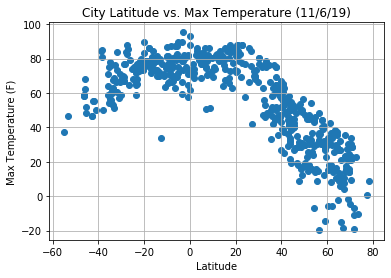

In [13]:
#Plot latitude vs temperature and save as .png
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (11/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/Latitude_VS_Temperature_Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

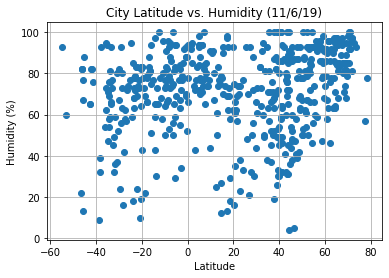

In [15]:
#Plot Latitude vs. Humidity and save as .png
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.title("City Latitude vs. Humidity (11/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/City_Latitude_VS_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

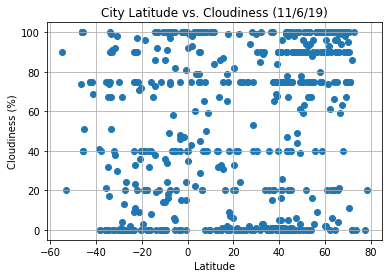

In [16]:
#Plot Latitude vs. Cloudiness and save as .png
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (11/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Latitude_VS_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

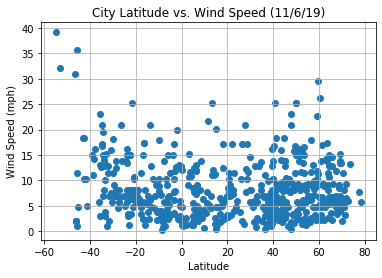

In [17]:
#Plot Latitude vs. Wind Speed and save as .png
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (11/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Latitude_VS_Wind_Speed.png")
plt.show()